Question 1 : What are Type I and Type II errors in hypothesis testing, and how do they impact decision-making

Ans: A Type I error occurs when we reject a true null hypothesis (H₀).
Can lead to wrong actions, such as launching a faulty product or approving an ineffective drug

Risky in areas like medicine, law, and finance


A Type II error occurs when we fail to reject a false null hypothesis.

Leads to missed opportunities, such as rejecting a useful innovation

Costly in research, quality control, and fraud detection

Question 2:What is the P-value in hypothesis testing, and how should it be interpreted in the context of the null hypothesis?

Ans: The P-value is the probability of obtaining the observed results assuming that the null hypothesis (H₀) is true.

Small P-value (≤ 0.05):
The observed data is unlikely if the null hypothesis were true → reject H₀

Large P-value (> 0.05):
The observed data is likely under H₀ → do not reject H₀

Question 3:Explain the difference between a Z-test and a T-test, including when to use each

Ans: Z-test

Definition:
A Z-test is used to determine whether there is a significant difference between a sample mean and a population mean when the population variance is known.

T-test

Definition:
A T-test is used to compare means when the population standard deviation is unknown and must be estimated from the sample.

Question 4:What is a confidence interval, and how does the margin of error influence its width and interpretation?

Ans: Definition:
The margin of error (MOE) represents the maximum expected difference between the sample estimate and the true population value.

Margin of Error = Critical Value × Standard Error

1. Confidence Level

Higher confidence (99%) → larger margin of error → wider interval

Lower confidence (90%) → smaller margin of error → narrower interval

2. Sample Size

Larger sample size → smaller standard error → narrower interval

Smaller sample size → wider interval

3. Data Variability

More variability in data → larger margin of error

Less variability → more precise interval


Question 5: Describe the purpose and assumptions of an ANOVA test. How does it extend hypothesis testing to more than two groups?

Ans: To compare multiple group means simultaneously

To avoid increased Type I error that would occur if we performed many pairwise t-tests

To determine whether at least one group mean differs from the others


Between-group variance (differences among group means)

Within-group variance (variation inside each group)



Question 6: Write a Python program to perform a one-sample Z-test and interpret the result for a given dataset.

import numpy as np
from scipy.stats import norm

# Given data
sample_data = np.array([52, 55, 48, 50, 54, 51, 49, 53])
population_mean = 50
population_std = 10
alpha = 0.05

# Sample statistics
sample_mean = np.mean(sample_data)
n = len(sample_data)

# Z-test statistic
z_score = (sample_mean - population_mean) / (population_std / np.sqrt(n))

# Two-tailed p-value
p_value = 2 * (1 - norm.cdf(abs(z_score)))

# Output
print("Sample Mean:", sample_mean)
print("Z-score:", z_score)
print("P-value:", p_value)

# Decision
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Question 7:Simulate a dataset from a binomial distribution (n = 10, p = 0.5) using NumPy and plot the histogram.

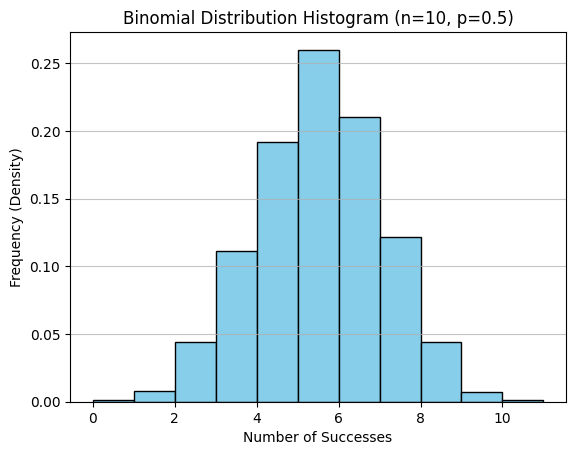

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the binomial distribution
n = 10  # Number of trials
p = 0.5  # Probability of success
size = 1000  # Sample size (number of simulations/experiments)

# Simulate the dataset using NumPy's random.binomial function
# Each value in the 'data' array is the number of successes in 10 trials
data = np.random.binomial(n, p, size)

# Plot the histogram of the simulated data using Matplotlib
plt.hist(data, bins=range(n + 2), density=True, color='skyblue', edgecolor='black')

# Add labels and a title
plt.xlabel('Number of Successes')
plt.ylabel('Frequency (Density)')
plt.title('Binomial Distribution Histogram (n=10, p=0.5)')
plt.grid(axis='y', alpha=0.75)

# Display the plot
plt.show()


Question 8: Generate multiple samples from a non-normal distribution and implement the Central Limit Theorem using Python.

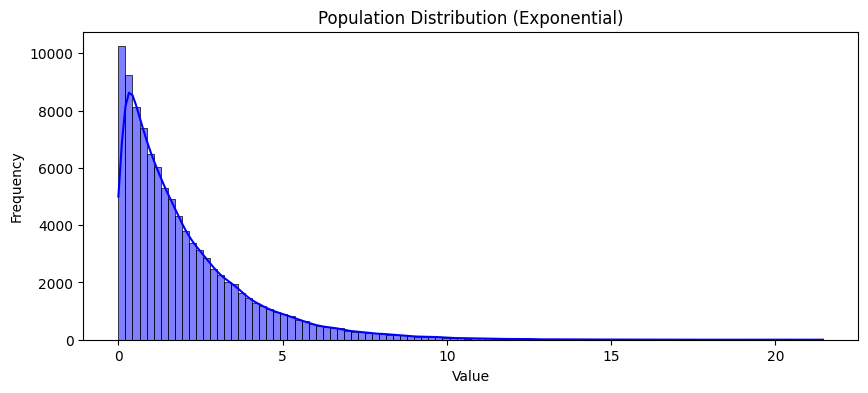

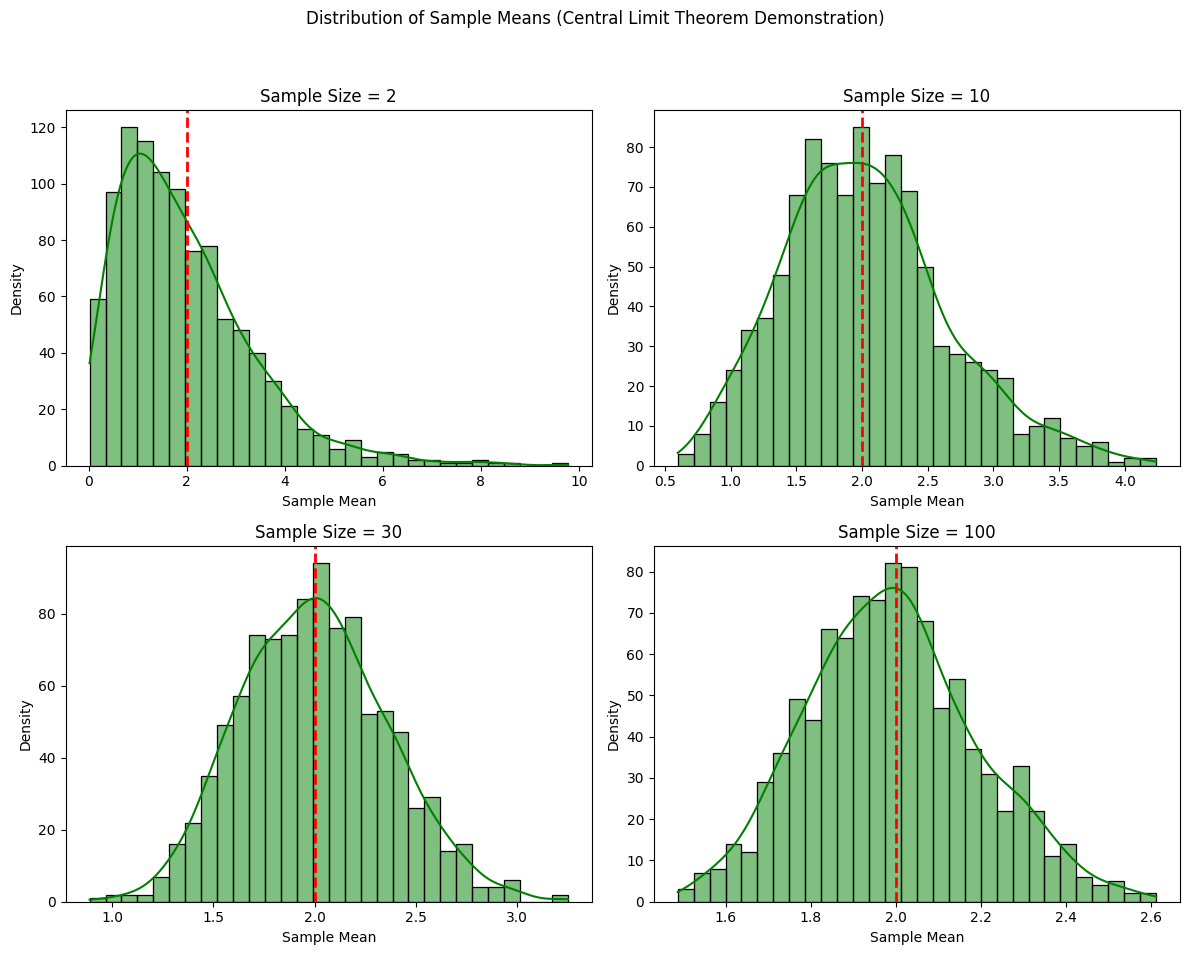

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a random seed for reproducibility
np.random.seed(0)

# --- 1. Generate a non-normal population (Exponential Distribution) ---
# Simulating a population with a highly skewed distribution
# The scale parameter (beta) is the mean of the exponential distribution.
population_scale = 2.0
population = np.random.exponential(scale=population_scale, size=100000)

# Plot the population distribution (optional, to show it's non-normal)
plt.figure(figsize=(10, 4))
sns.histplot(population, kde=True, bins=100, color='blue')
plt.title('Population Distribution (Exponential)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# --- 2. Implement the Central Limit Theorem (CLT) ---
sample_sizes = [2, 10, 30, 100]  # Different sample sizes to demonstrate CLT
num_samples = 1000  # Number of samples to draw for each size

# Store the means of the samples
sample_means = {}

for size in sample_sizes:
    means = []
    for _ in range(num_samples):
        # Draw random samples of a specific size from the population
        samples = np.random.choice(population, size=size, replace=True)
        # Calculate the mean of the sample and store it
        means.append(np.mean(samples))
    sample_means[size] = means

# --- 3. Visualize the distributions of sample means ---
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Distribution of Sample Means (Central Limit Theorem Demonstration)')

for i, size in enumerate(sample_sizes):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.histplot(sample_means[size], kde=True, bins=30, color='green', ax=ax)
    ax.set_title(f'Sample Size = {size}')
    ax.set_xlabel('Sample Mean')
    ax.set_ylabel('Density')
    # Add vertical line at the population mean
    ax.axvline(population_scale, color='red', linestyle='dashed', linewidth=2)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Question 9: Write a Python function to calculate and visualize the confidence interval for a sample mean.

Question 9: Write a Python function to calculate and visualize the confidence interval for a sample mean.

Sample Mean (μ): 169.06
Confidence Level: 95%
Confidence Interval: (167.38, 170.74)


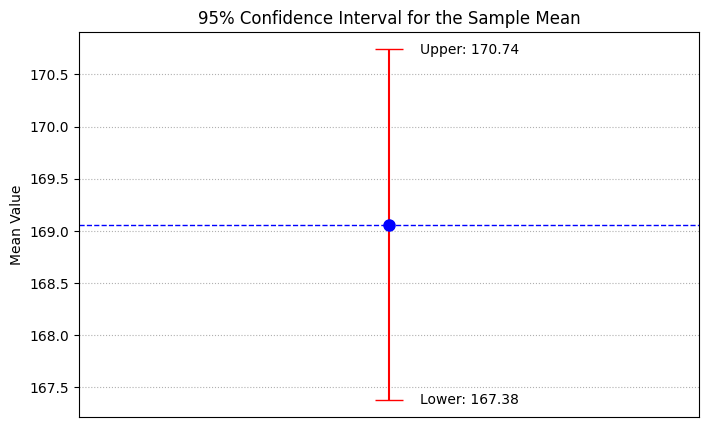

In [3]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

def calculate_and_visualize_ci(data, confidence=0.95):
    """
    Calculates and visualizes the confidence interval for a sample mean.

    Args:
        data (list or np.array): The sample data.
        confidence (float): The desired confidence level (e.g., 0.95 for 95%).
    """
    # Convert data to a numpy array for easier calculations
    a = np.array(data)
    n = len(a)

    if n <= 1:
        print("Error: Sample size must be greater than 1 to calculate a confidence interval.")
        return

    # Calculate sample mean and standard error of the mean (SEM)
    m = np.mean(a)
    # scipy.stats.sem calculates the SEM using Bessel's correction (ddof=1 by default)
    se = st.sem(a)

    # Calculate the confidence interval using the t-distribution
    # st.t.interval takes: confidence level (alpha), degrees of freedom (df),
    # sample mean (loc), and standard error (scale)
    ci_lower, ci_upper = st.t.interval(confidence, n - 1, loc=m, scale=se)

    print(f"Sample Mean (μ): {m:.2f}")
    print(f"Confidence Level: {confidence*100:.0f}%")
    print(f"Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")

    # --- Visualization ---
    # The margin of error (h) is half the width of the interval
    h = (ci_upper - ci_lower) / 2

    plt.figure(figsize=(8, 5))
    # Plot the mean as a point with error bars representing the CI
    plt.errorbar(x=[1], y=[m], yerr=[h], fmt='o', color='blue', capsize=10, markersize=8, ecolor='red')
    plt.xlim(0.5, 1.5) # Adjust x-axis limits for better viewing
    plt.title(f'{confidence*100:.0f}% Confidence Interval for the Sample Mean')
    plt.ylabel('Mean Value')
    plt.xticks([]) # Hide x-axis ticks
    # Add labels for the limits
    plt.text(1.05, ci_lower, f'Lower: {ci_lower:.2f}', verticalalignment='center')
    plt.text(1.05, ci_upper, f'Upper: {ci_upper:.2f}', verticalalignment='center')
    plt.hlines(m, 0.5, 1.5, color='blue', linestyle='--', linewidth=1) # Horizontal line for the mean
    plt.grid(axis='y', linestyle=':')
    plt.show()

# --- Example Usage ---
# Simulate sample data (e.g., a sample of heights)
np.random.seed(42) # for reproducibility
sample_data = np.random.normal(loc=170, scale=5, size=30)

# Calculate and visualize a 95% confidence interval
calculate_and_visualize_ci(sample_data, confidence=0.95)


Question 10: Perform a Chi-square goodness-of-fit test using Python to compare observed and expected distributions, and explain the outcome.

In [4]:
import scipy.stats as stats
import numpy as np

# Observed frequencies from the experiment (e.g., a die roll)
observed_frequencies = [8, 10, 12, 11, 9, 10]
# Expected frequencies (if the die is fair, each side appears 60/6 = 10 times)
expected_frequencies = [10, 10, 10, 10, 10, 10]

# Perform the Chi-square goodness-of-fit test
chi2_statistic, p_value = stats.chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

# Print the results
print(f"Chi-square test statistic: {chi2_statistic}")
print(f"P-value: {p_value}")

# Interpret the outcome using a significance level (alpha) of 0.05
alpha = 0.05

print(f"\n--- Interpretation (at alpha = {alpha}) ---")
if p_value < alpha:
    print("Result: Reject the null hypothesis.")
    print("Conclusion: The observed distribution is significantly different from the expected distribution (the die is likely not fair).")
else:
    print("Result: Fail to reject the null hypothesis.")
    print("Conclusion: The observed distribution is not significantly different from the expected distribution (the data is consistent with a fair die).")



Chi-square test statistic: 1.0
P-value: 0.9625657732472964

--- Interpretation (at alpha = 0.05) ---
Result: Fail to reject the null hypothesis.
Conclusion: The observed distribution is not significantly different from the expected distribution (the data is consistent with a fair die).


Question 10: Perform a Chi-square goodness-of-fit test using Python to compare observed and expected distributions, and explain the outcome.

In [5]:
import scipy.stats as stats
import numpy as np

# Observed frequencies (counts for each face of the die: 1, 2, 3, 4, 5, 6)
observed_frequencies = [8, 10, 12, 11, 9, 10]

# Expected frequencies for a fair die (60 rolls / 6 faces = 10 per face)
expected_frequencies = [10, 10, 10, 10, 10, 10]

# Perform the Chi-square goodness-of-fit test
chi_square_test_statistic, p_value = stats.chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

# Print the results
print(f"Chi-square test statistic: {chi_square_test_statistic}")
print(f"P-value: {p_value}")

# Interpret the outcome at a significance level of alpha = 0.05
alpha = 0.05

if p_value < alpha:
    print("Result: Reject the null hypothesis (H0)")
    print("Conclusion: The observed distribution is significantly different from the expected uniform distribution, suggesting the die is likely unfair.")
else:
    print("Result: Fail to reject the null hypothesis (H0)")
    print("Conclusion: There is not enough evidence to conclude that the observed distribution is different from the expected uniform distribution, suggesting the die is likely fair.")


Chi-square test statistic: 1.0
P-value: 0.9625657732472964
Result: Fail to reject the null hypothesis (H0)
Conclusion: There is not enough evidence to conclude that the observed distribution is different from the expected uniform distribution, suggesting the die is likely fair.
